In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [33]:
data = pd.read_csv("C:\\Users\\TEST\\Downloads\\Clustering_dataset.zip")

In [34]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [35]:
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [36]:
data = data.drop(columns=['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
data['RainToday'] = data['RainToday'].replace({'No': 0, 'Yes': 1})
data['RainTomorrow'] = data['RainTomorrow'].replace({'No': 0, 'Yes': 1})
data.fillna(data.mean(),inplace=True)
print(data.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6     5.468232  7.611178           44.0   
1      7.4     25.1       0.0     5.468232  7.611178           44.0   
2     12.9     25.7       0.0     5.468232  7.611178           46.0   
3      9.2     28.0       0.0     5.468232  7.611178           24.0   
4     17.5     32.3       1.0     5.468232  7.611178           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       1007.1  8.000000   4.50993     16.9     21.8        

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_normalised = scaler.fit_transform(data)

print(data_normalised)

[[ 1.89446615e-01 -4.53363105e-02 -2.10071794e-01 ...  1.70232282e-02
  -5.43697729e-01 -5.43691009e-01]
 [-7.53100728e-01  2.65043084e-01 -2.81649838e-01 ...  3.81984952e-01
  -5.43697729e-01 -5.43691009e-01]
 [ 1.10901003e-01  3.49692009e-01 -2.81649838e-01 ...  2.21401794e-01
  -5.43697729e-01 -5.43691009e-01]
 ...
 [-1.06728318e+00  5.18989861e-01 -2.81649838e-01 ...  6.44757393e-01
  -5.43697729e-01 -5.43691009e-01]
 [-6.90264238e-01  5.33098015e-01 -2.81649838e-01 ...  6.30158924e-01
  -5.43697729e-01 -5.43691009e-01]
 [ 4.25083451e-01 -5.01222327e-16 -2.81649838e-01 ... -1.14362992e-01
  -5.43697729e-01  0.00000000e+00]]


In [38]:
print(data.shape)

(145460, 18)


C:\Users\TEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\TEST\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

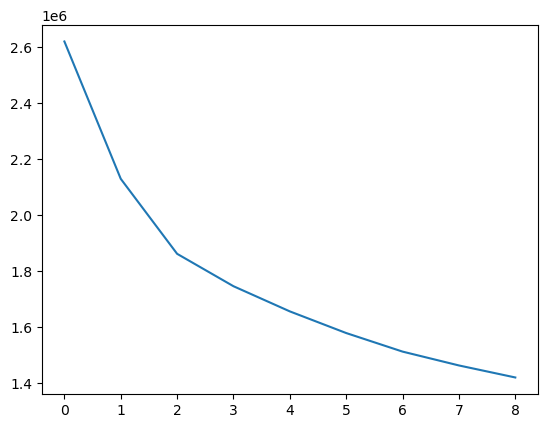

In [39]:
from sklearn.cluster import KMeans
sse = []
for k in range (1,10):
    km = KMeans(n_clusters=k)
    km.fit(data_normalised)
    sse.append(km.inertia_)

plt.plot(range(0,9),sse)
plt.show()

In [52]:
def kmeans_clustering(data_normalised, n_clusters, max_iters=1):
    centroids = data_normalised[np.random.choice(data_normalised.shape[0], n_clusters, replace=False)]
    for _ in range(max_iters):
        clusters = assign_clusters(data_normalised, centroids)
        new_centroids = update_centroids(data_normalised, clusters, n_clusters)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return centroids

def assign_clusters(data_normalised, centroids):
    clusters = []
    for point in data_normalised:
        distances = np.linalg.norm(centroids - point, axis=1)
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data_normalised, clusters, n_clusters):
    new_centroids = []
    for cluster in range(n_clusters):
        cluster_points = data_normalised[clusters == cluster]
        new_centroid = np.mean(cluster_points, axis=0)
        new_centroids.append(new_centroid)
    return np.array(new_centroids)
    
    
centroids = kmeans_clustering(data_normalised, n_clusters=2)
    
print("Final centroids:")
print(centroids)


Final centroids:
[[-0.5803781  -0.64659462  0.00509114 -0.34735172 -0.19521128 -0.27828159
  -0.16676177 -0.2825644   0.3980636   0.27396258  0.49020662  0.52834716
   0.10871901  0.10507825 -0.65400059 -0.61920684  0.09749247  0.02966529]
 [ 0.68160765  0.75937365 -0.00597914  0.4079368   0.22926003  0.32681947
   0.19584836  0.33184928 -0.46749385 -0.32174713 -0.57570846 -0.62050147
  -0.12768177 -0.123406    0.76807137  0.7272089  -0.1144971  -0.0348395 ]]


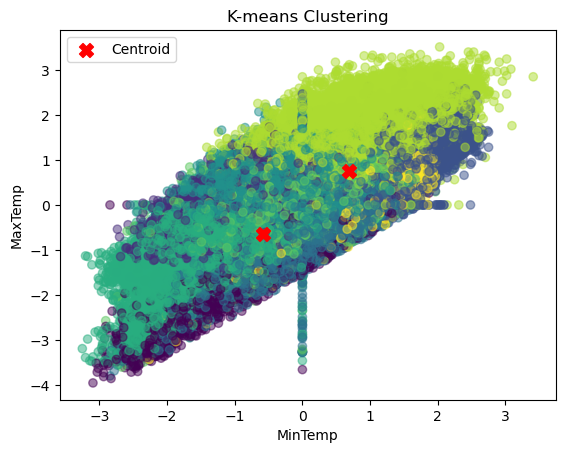

In [53]:
plt.scatter(data_normalised[:, 0], data_normalised[:, 1], c=km.labels_, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroid')
plt.title('K-means Clustering')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')

plt.legend()
plt.show()